In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_edge_approx(edge_image, edge_approximations):
    # Plot des Edge-Bildes
    plt.imshow(edge_image, cmap='gray')

    # Plot der approximierten Kanten als Linien mit blauer Farbe
    for edge_approx in edge_approximations:
        x_approx = edge_approx[:, :, 0].flatten()
        y_approx = edge_approx[:, :, 1].flatten()
        plt.plot(x_approx, y_approx, color='blue')

        # Plot der Eckpunkte als rote Punkte
        plt.plot(x_approx, y_approx, 'ro')

    plt.title('Edge Approximation')

    # Anpassung der Achsenskalierung
    plt.axis('scaled')

    # Anzeigen des Diagramms
    plt.show()

## 1. BUG Fix Second Try
---
The Edge Points are already Ordered by approxPolyDP

In [114]:
edge_image = np.array([
       [255,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]]).astype(np.uint8)

contours, _ = cv2.findContours(edge_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_points = sorted(contours[0], key=lambda x: x[0][0])

In [115]:
sorted_points

[array([[0, 0]], dtype=int32),
 array([[0, 1]], dtype=int32),
 array([[0, 2]], dtype=int32),
 array([[0, 3]], dtype=int32),
 array([[0, 4]], dtype=int32),
 array([[0, 5]], dtype=int32),
 array([[0, 6]], dtype=int32),
 array([[0, 7]], dtype=int32),
 array([[0, 8]], dtype=int32),
 array([[0, 9]], dtype=int32),
 array([[0, 8]], dtype=int32),
 array([[0, 7]], dtype=int32),
 array([[0, 6]], dtype=int32),
 array([[0, 5]], dtype=int32),
 array([[0, 4]], dtype=int32),
 array([[0, 3]], dtype=int32),
 array([[0, 2]], dtype=int32),
 array([[0, 1]], dtype=int32),
 array([[1, 9]], dtype=int32),
 array([[1, 9]], dtype=int32),
 array([[2, 9]], dtype=int32),
 array([[2, 0]], dtype=int32),
 array([[2, 9]], dtype=int32),
 array([[3, 9]], dtype=int32),
 array([[3, 0]], dtype=int32),
 array([[3, 0]], dtype=int32),
 array([[3, 9]], dtype=int32),
 array([[4, 9]], dtype=int32),
 array([[4, 0]], dtype=int32),
 array([[4, 0]], dtype=int32),
 array([[4, 9]], dtype=int32),
 array([[5, 9]], dtype=int32),
 array([

In [117]:
sorted_points[9]

array([[0, 9]], dtype=int32)

In [138]:
def getContourApproximation(edge_image, epsilon):
    # Finde Konturen im Schwellwertbild
    contours, _ = cv2.findContours(edge_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    contour_segments = []
    # Fitting von Geraden durch die Konturen
    for contour in contours:
        # Konturpunkte reduzieren
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Sortieren der Konturen
        # sorted_points = np.array(sorted(contour, key=lambda x: x[0][0]))
        sorted_points = contour
        # print('sorted_points', sorted_points)
        rescent_index = 0

        # print('sorted_points', sorted_points)
        # print('approx', approx)
        
        segment = []
        # Segmente hinzufügen
        for i in range(len(approx)):
            if i == 0:
                start_point = approx[i][0]
                segment.append(np.array([start_point]))

            end_point = approx[(i+1) % len(approx)][0]

            # Find Index
            indexes = np.where(np.all(sorted_points == end_point, axis=(1, 2)))
            if indexes[0].size == 0:
                break

            delete_indices = slice(rescent_index + 1, indexes[0][0])
            # print('!!!!!', delete_indices)
            sorted_points = np.delete(sorted_points, delete_indices, axis=0)

            # if ((len(sorted_points) <= rescent_index - 1) and np.all(sorted_points == end_point, axis=(1, 2)) == False):

            # reset resecent_index
            rescent_index += 2 

            # append edgepoint to segment
            segment.append(np.array([end_point]))

            if (len(sorted_points) <= rescent_index - 1):
                break

            # print('sorted_points', sorted_points)
            # print('end_point', end_point)
            # print('indexes', indexes[0][0])
            print('rescent_index', rescent_index)
            print('len(sorted_points)', len(sorted_points))
            # print('-------------- \n')

        contour_segments.append(np.array(segment))

    return contour_segments


## 2. Test Algorithm
---
### 2.1 Test 1
- High Epsilon: Success

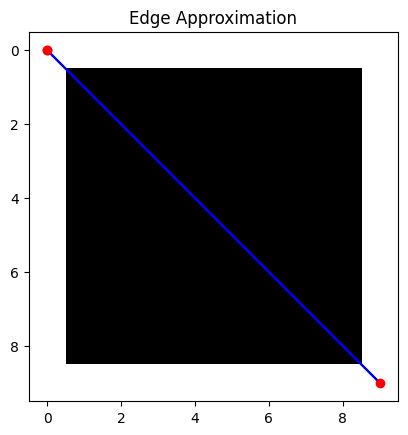

In [133]:
edge_image = np.array([
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]]).astype(np.uint8)

plot_edge_approx(edge_image, getContourApproximation(edge_image, 10))

### 2.2 Test 2
- Problem: Konturen sind nicht so sortiert wie gewünscht.

In [287]:
def checkIfSegmentNotInUsedContours(segment_contour_points, used_contour_points):
    is_not_in = False
    for point in segment_contour_points:
        if not any(np.all(point == p) for p in used_contour_points):
            is_not_in = True
            break
    return is_not_in

def getContourApproximation2(edge_image, epsilon):
    contours, _ = cv2.findContours(edge_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    contour_segments = []
    for contour in contours:
        approx = cv2.approxPolyDP(contour, epsilon, True)

        print('contour', ','.join([str(k) for k in contour]), '\n')
        print('approx', ','.join([str(k) for k in approx]), '\n')

        sorted_points = contour
        rescent_index = 0
        
        used_contour_points = None
        segment = []
        for i in range(len(approx)):
            if i == 0:
                start_point = approx[i][0]
                segment.append(np.array([start_point]))
            end_point = approx[(i+1) % len(approx)][0]

            indexes = np.where(np.all(contour == end_point, axis=(1, 2)))


            # Find Index
            indexes = np.where(np.all(sorted_points == end_point, axis=(1, 2)))
            if indexes[0].size == 0:
                break

            segment_contour_points = None
            if i == len(approx) - 1:
                segment_contour_points = np.concatenate((contour[rescent_index:], contour[:indexes[0][0]]))
            elif rescent_index < indexes[0][0]:
                segment_contour_points = contour[rescent_index: indexes[0][0]]
            elif rescent_index > indexes[0][0]:
                segment_contour_points = contour[indexes[0][0]: rescent_index]


            # segment_contour_points = contour[rescent_index: indexes[0][0]] if rescent_index < indexes[0][0] else contour[indexes[0][0]: rescent_index]
            
            print('\nsegment', ','.join([str(k) for k in segment_contour_points]))
            print('used_contour_points', ','.join([str(k) for k in used_contour_points]) if i != 0 else used_contour_points)
            print('recentIndex', rescent_index, 'index', indexes[0][0], 'end_point', end_point)
            print('is in', checkIfSegmentNotInUsedContours(segment_contour_points, used_contour_points) if i != 0 else True)
            
            if checkIfSegmentNotInUsedContours(segment_contour_points, used_contour_points) if i != 0 else True:
                if i == 0:
                    used_contour_points = contour[rescent_index: indexes[0][0]]
                else:
                    used_contour_points = np.concatenate((used_contour_points, contour[rescent_index: indexes[0][0]]), axis=0)
            else:
                print('!!!!!!!! END !!!!!!!!!!')
                break

            rescent_index = indexes[0][0]
            segment.append(np.array([end_point]))

        contour_segments.append(np.array(segment))

    return contour_segments


contour [[0 0]],[[0 1]],[[0 2]],[[0 3]],[[0 4]],[[0 5]],[[0 6]],[[0 7]],[[0 8]],[[0 9]],[[1 9]],[[2 9]],[[3 9]],[[4 9]],[[5 9]],[[6 9]],[[7 9]],[[8 9]],[[9 9]],[[9 8]],[[9 7]],[[9 6]],[[9 5]],[[9 4]],[[9 3]],[[9 2]],[[9 1]],[[9 0]],[[8 0]],[[7 0]],[[6 0]],[[5 0]],[[4 0]],[[3 0]],[[2 0]],[[1 0]] 

approx [[0 0]],[[0 9]],[[9 9]],[[9 0]] 


segment [[0 0]],[[0 1]],[[0 2]],[[0 3]],[[0 4]],[[0 5]],[[0 6]],[[0 7]],[[0 8]]
used_contour_points None
recentIndex 0 index 9 end_point [0 9]
is in True

segment [[0 9]],[[1 9]],[[2 9]],[[3 9]],[[4 9]],[[5 9]],[[6 9]],[[7 9]],[[8 9]]
used_contour_points [[0 0]],[[0 1]],[[0 2]],[[0 3]],[[0 4]],[[0 5]],[[0 6]],[[0 7]],[[0 8]]
recentIndex 9 index 18 end_point [9 9]
is in True

segment [[9 9]],[[9 8]],[[9 7]],[[9 6]],[[9 5]],[[9 4]],[[9 3]],[[9 2]],[[9 1]]
used_contour_points [[0 0]],[[0 1]],[[0 2]],[[0 3]],[[0 4]],[[0 5]],[[0 6]],[[0 7]],[[0 8]],[[0 9]],[[1 9]],[[2 9]],[[3 9]],[[4 9]],[[5 9]],[[6 9]],[[7 9]],[[8 9]]
recentIndex 18 index 27 end_point [9 0

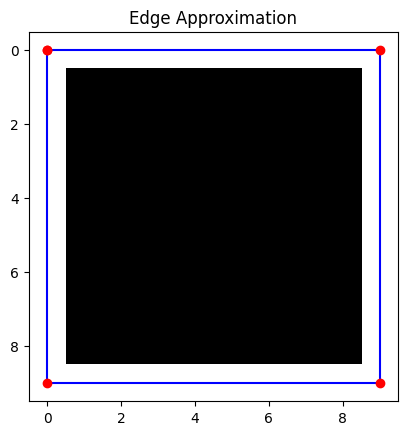

In [288]:
edge_image = np.array([
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]]).astype(np.uint8)


edge_points = getContourApproximation2(edge_image, 1)
print('############# \n edge_points', ','.join([str(k) for k in edge_points[0]]))
plot_edge_approx(edge_image, edge_points)

contour [[0 0]],[[0 1]],[[0 2]],[[0 3]],[[0 4]],[[0 5]],[[0 6]],[[0 7]],[[0 8]],[[0 9]],[[1 9]],[[2 9]],[[3 9]],[[4 9]],[[5 9]],[[6 9]],[[7 9]],[[8 9]],[[9 9]],[[9 8]],[[9 7]],[[9 6]],[[9 5]],[[9 4]],[[9 3]],[[9 2]],[[9 1]],[[9 0]],[[8 1]],[[7 2]],[[6 3]],[[5 4]],[[4 5]],[[3 4]],[[2 3]],[[2 2]],[[1 1]] 

approx [[0 0]],[[0 9]],[[9 9]],[[9 0]],[[4 5]],[[2 3]],[[2 2]] 


segment [[0 0]],[[0 1]],[[0 2]],[[0 3]],[[0 4]],[[0 5]],[[0 6]],[[0 7]],[[0 8]]
used_contour_points None
recentIndex 0 index 9 end_point [0 9]
is in True

segment [[0 9]],[[1 9]],[[2 9]],[[3 9]],[[4 9]],[[5 9]],[[6 9]],[[7 9]],[[8 9]]
used_contour_points [[0 0]],[[0 1]],[[0 2]],[[0 3]],[[0 4]],[[0 5]],[[0 6]],[[0 7]],[[0 8]]
recentIndex 9 index 18 end_point [9 9]
is in True

segment [[9 9]],[[9 8]],[[9 7]],[[9 6]],[[9 5]],[[9 4]],[[9 3]],[[9 2]],[[9 1]]
used_contour_points [[0 0]],[[0 1]],[[0 2]],[[0 3]],[[0 4]],[[0 5]],[[0 6]],[[0 7]],[[0 8]],[[0 9]],[[1 9]],[[2 9]],[[3 9]],[[4 9]],[[5 9]],[[6 9]],[[7 9]],[[8 9]]
recent

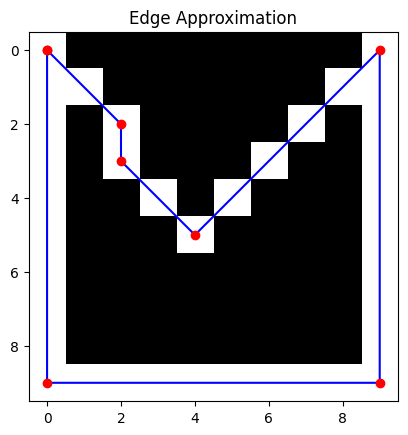

In [291]:
edge_image = np.array([
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255, 255,   0,   0,   0,   0,   0,   0, 255, 255],
       [255,   0, 255,   0,   0,   0,   0, 255,   0, 255],
       [255,   0, 255,   0,   0,   0, 255,   0,   0, 255],
       [255,   0,   0, 255,   0, 255,   0,   0,   0, 255],
       [255,   0,   0,   0, 255,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]]).astype(np.uint8)


edge_points = getContourApproximation2(edge_image, 0)
print('############# \n edge_points', ','.join([str(k) for k in edge_points[0]]))
plot_edge_approx(edge_image, edge_points)